In [2]:
from examples.wmt_2020.common.util.reader import read_annotated_file, read_test_file
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

TRAIN_FILE = "data/ru-en/train.ruen.df.short.tsv"
DEV_FILE = "data/ru-en/dev.ruen.df.short.tsv"
TEST_FILE = "data/ru-en/test20.ruen.df.short.tsv"

train = read_annotated_file(TRAIN_FILE, index="segid")
dev = read_annotated_file(DEV_FILE, index="segid")
test = read_test_file(TEST_FILE, index="segid")

train[:10]

,index,original,translation,z_mean
0,10005,О необходимости уплачивать проценты по займам ...,The need to pay interest on loans as one of th...,0.588656
1,735,"Быть на низ плыть, коли вёсел нет.","To be at the bottom, if you don't have oars.",-0.795477
2,9774,"На кадрах ролика видно, как полицейский боретс...",The footage shows a police officer wrestling w...,0.651474
3,6682,Почему бы не ввести классификацию информационн...,Why not classify information products accordin...,0.395690
4,8898,Министр здравоохранения России Вероника Скворц...,Russian Minister of Health Veronika Skvortsova...,0.541390
5,7113,Почему Константин Райкин на съезде СТД произнё...,Why Konstantin Raikin made a speech about cens...,0.679079
6,9145,Только самостоятельно организовавшись для отст...,Only by organizing themselves to defend their ...,0.505246
7,2362,"Храни себя от бед, пока их нет.",Keep yourself out of trouble until there are n...,-0.146389
8,9042,Фили. Солнцеликий едет по МЦД.,Fili. The sun is coming down on the IDC.,-0.837099
9,7169,"Вода замерзает при 0°, а закипает при 100°.",The water freezes at 0 ° and boils at 100 °.,0.962939


In [3]:
train.describe()

,z_mean
count,7000.000000
mean,0.001930
std,0.932950
min,-3.294812
25%,-0.565818
50%,0.414200
75%,0.692160
max,1.286588


In [4]:
dev.describe()

,z_mean
count,1000.000000
mean,0.008686
std,0.918192
min,-2.741368
25%,-0.530812
50%,0.398931
75%,0.692295
max,1.201583


mean-original 9.61 std-original 6.79 mean-translation 11.71 std-translation 7.98 max-original 73.00 max-translation 89.00


<Figure size 432x288 with 0 Axes>

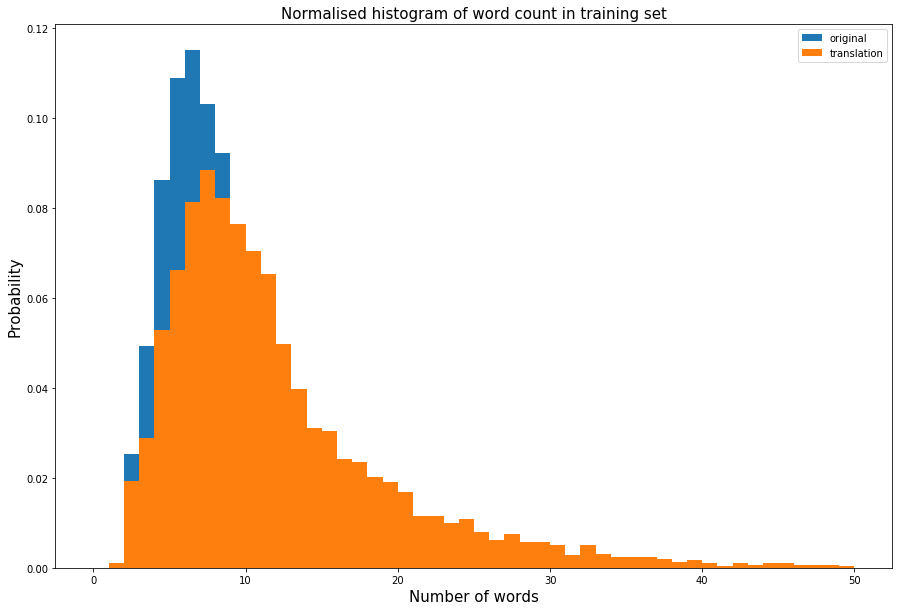

In [5]:
import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(train['original'].tolist()).astype(str)
translation_qs = pd.Series(train['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in training set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))

mean-original 9.68 std-original 7.34 mean-translation 11.59 std-translation 8.57 max-original 68.00 max-translation 81.00


<Figure size 432x288 with 0 Axes>

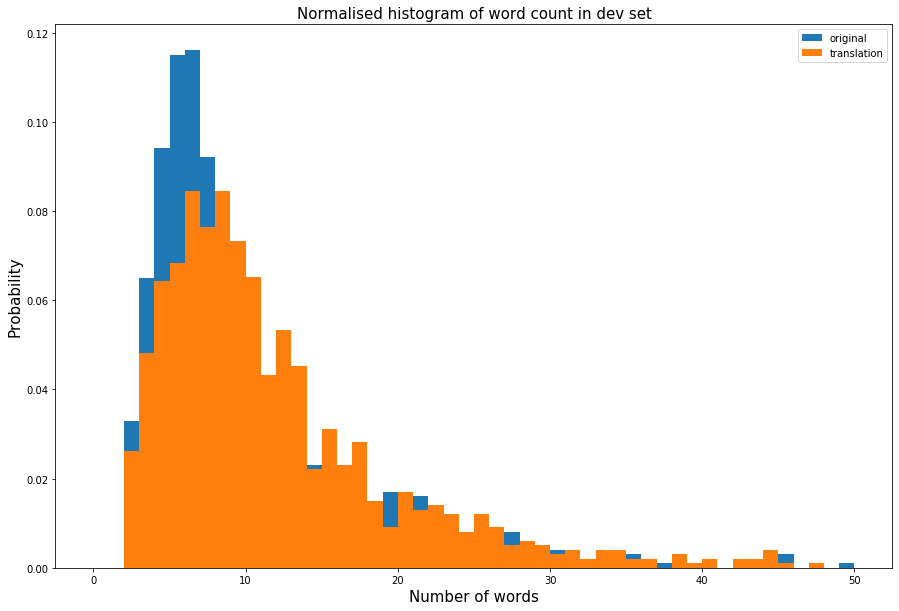

In [6]:
import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(dev['original'].tolist()).astype(str)
translation_qs = pd.Series(dev['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in dev set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))



